In [15]:
import pandas as pd
import json
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

### The Next cell basically manages the dataset to have similar country names. Many Countries are not in the json file that we have. So we are getting rid of it. 

In [10]:
# Load the CSV file

pop_raw = pd.read_csv('./population-and-demography.csv')
male_pop_raw = pd.read_csv('./Male - population-and-demography.csv')
female_pop_raw = pd.read_csv('./female - population-and-demography.csv')
life_expec_raw = pd.read_csv('./life expectancy - population-and-demography.csv')
death_rate_raw = pd.read_csv('./death rate - population-and-demography.csv')
birth_rate_raw = pd.read_csv('./birth rate - population-and-demography.csv')
child_death_raw = pd.read_csv('./child mortality rate - population-and-demography.csv')

                   
# List of non-country entries created by chat GPT 
non_countries = [
    'Africa (UN)', 'Asia (UN)', 'Europe (UN)', 'High-income countries', 'Land-locked developing countries (LLDC)', 
    'Latin America and the Caribbean (UN)', 'Least developed countries', 'Less developed regions', 
    'Less developed regions, excluding China', 'Less developed regions, excluding least developed countries', 
    'Low-income countries', 'Lower-middle-income countries', 'More developed regions', 'Northern America (UN)',
    'Oceania (UN)', 'Small island developing states (SIDS)', 'Upper-middle-income countries', 'World', 'Aruba', 'Barbados', 'Burundi', 'Saint Barthelemy', 'Bermuda', 'Brunei',
    'Bonaire Sint Eustatius and Saba', "Cote d'Ivoire", 'Curacao', 'Falkland Islands',
    'French Guiana', 'Guernsey', 'Guam', 'Jersey', 'Kiribati', 'Saint Martin (French part)',
    'Northern Mariana Islands', 'Nauru', 'Niue', 'Reunion', 'Rwanda',
    'Sint Maarten (Dutch part)', 'Tokelau', 'Turkey', 'Kosovo', 'Yemen' 
]

# Filter out the non-country entries
pop = pop_raw[~pop_raw['Country name'].isin(non_countries)]
male_pop = male_pop_raw[~male_pop_raw['Country name'].isin(non_countries)]
female_pop = female_pop_raw[~female_pop_raw['Country name'].isin(non_countries)]
life_expec_raw2 = life_expec_raw[~life_expec_raw['Country name'].isin(non_countries)]
death_rate_raw2 = death_rate_raw[~death_rate_raw['Country name'].isin(non_countries)]
birth_rate_raw2 = birth_rate_raw [~birth_rate_raw ['Country name'].isin(non_countries)]
child_death_raw2 = child_death_raw[~child_death_raw['Country name'].isin(non_countries)]

#Filter out 'Vatican' from some files
death_rate = death_rate_raw2[death_rate_raw2['Country name'] != 'Vatican']
birth_rate = birth_rate_raw2[birth_rate_raw2['Country name'] != 'Vatican']
child_death = child_death_raw2[child_death_raw2['Country name'] != 'Vatican']
life_expec = life_expec_raw2[life_expec_raw2['Country name'] != 'Vatican']


### In the next cell I only kept the column that I will use 

In [11]:
pop = pop[['Country name', 'Year', 'Population']]
male_pop = male_pop[['Country name', 'Year', 'Male population']]
female_pop = female_pop[['Country name', 'Year', 'Female population']]


### All the data we had didn't have any ISO3 code with them which we will use to make a link with our worl.json file. So we used chatGPT to create the ISO3 for every countyr. The prompt was "Here is the name of the countires. Now use your knowledge to give me the ISO3 and ISO2 for the countires and give me the list in a CSV file"

In [24]:
iso = pd.read_csv('./Country_with_ISO_Codes.csv')

### Merging data with ISO

In [21]:
pop_iso = pop.merge(iso, on='Country name', how='left')

### Basically we care creating a sample to check if our heat map is working. We used a log scale otherwise the large population of china and india makes other countires colors very dim

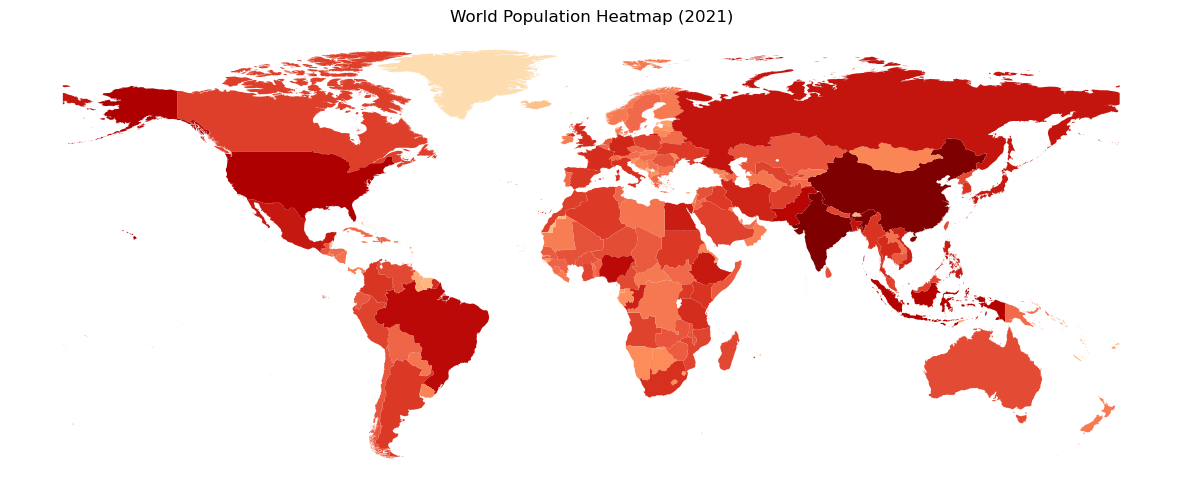

In [22]:
pop_2021 = pop_iso[pop_iso['Year'] == 2021]

world_geo = gpd.read_file('./world.json')

# Merge the population data with geographical data using ISO3 codes
merged_data = world_geo.merge(pop_2021, left_on='id', right_on='ISO3')

# Applying a logarithmic scale to the population data
merged_data['Log_Population'] = np.log1p(merged_data['Population'])

# Creating the heatmap without a legend
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_data.plot(column='Log_Population', ax=ax, legend=False, cmap='OrRd')

# Removing grid, x and y axis labels and ticks
ax.set_axis_off()

plt.title('World Population Heatmap (2021)')
plt.show()

### Later on, we will have a slider for every year where selecting a year will show the population in the heat map for that year. This study is more like a qualitative study rather than a quantitative analysis.